# Exploratory Data Analysis

The goal of this step is to understand the dataset, identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. It suggests the next logical steps, questions, or areas of research for your project.

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#import libraries and modules needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from PreProcessing import PreProcess

In [5]:
PreProcess

PreProcessing.PreProcess

### Data Extraction

Here, we intend to have an overview of the data,understand what is in the columns and their sample values. The data was collected over a period of one month, as seen on the start and end dates.

In [6]:
#to read the data
db = pd.read_csv('../data/Tellco_data.csv', na_values=['?', None])
db

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [7]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

A description of the columns can be found here (https://docs.google.com/spreadsheets/d/1QUOXuXK-W_DOovwgB6DO6-MtNSBQ62gc/edit#gid=497912695).How information is stored in a DataFrame or a Python object affects what we can do with it and the outputs of calculations as well. There are two data types, float(numeric data) and object(text data.)

In [8]:
#properties of the columns
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [9]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


### Data Cleaning

Checking for missing values in the data and fixing outliers.

In [10]:
#number of missing values for each column.
db.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(db):

    # Calculate total number of cells in dataframe
    totalCells = np.product(db.shape) #multiplication of rows and columns from np.product function

    # Count number of missing values per column
    missingCount = db.isnull().sum() #return no of missing rows for each column

    # Calculate total number of missing values
    totalMissing = missingCount.sum() 

    # Calculate percentage of missing values
    print("TellCo's data contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

TellCo's data contains 12.5 % missing values.


We need to handle missing values with the help of the data types ouput above. From the rule of thumb, for any object/text data type,we use the mode function , we will need to use the mode function(most appearing) to fill the missing values. For numeric data, we use the mean and median functions to approximate values to fill in. To choose which method to use, we need to check for skewness of data. Skewness refer to the distortion of a symmetrical curve. If the curve shifts to the left(-vely skewed) or right(+vely skewed), it is skewed,if symmetric, the data is not skewed. If the data is not skewed, then we assign the missing values with the mean or median. If skewed, we just use the median value.

In [12]:
#to calculate skewness,
db.skew(axis=0)

Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

From the output, the +ve values shows the data in the columns is +vely skewed and the negative values, -vely skewed.To confirm this, we can use plots for each columns to visualize the skewness.

array([[<AxesSubplot:title={'center':'Bearer Id'}>,
        <AxesSubplot:title={'center':'Start ms'}>,
        <AxesSubplot:title={'center':'End ms'}>,
        <AxesSubplot:title={'center':'Dur. (ms)'}>,
        <AxesSubplot:title={'center':'IMSI'}>,
        <AxesSubplot:title={'center':'MSISDN/Number'}>,
        <AxesSubplot:title={'center':'IMEI'}>],
       [<AxesSubplot:title={'center':'Avg RTT DL (ms)'}>,
        <AxesSubplot:title={'center':'Avg RTT UL (ms)'}>,
        <AxesSubplot:title={'center':'Avg Bearer TP DL (kbps)'}>,
        <AxesSubplot:title={'center':'Avg Bearer TP UL (kbps)'}>,
        <AxesSubplot:title={'center':'TCP DL Retrans. Vol (Bytes)'}>,
        <AxesSubplot:title={'center':'TCP UL Retrans. Vol (Bytes)'}>,
        <AxesSubplot:title={'center':'DL TP < 50 Kbps (%)'}>],
       [<AxesSubplot:title={'center':'50 Kbps < DL TP < 250 Kbps (%)'}>,
        <AxesSubplot:title={'center':'250 Kbps < DL TP < 1 Mbps (%)'}>,
        <AxesSubplot:title={'center':'DL TP > 1 M

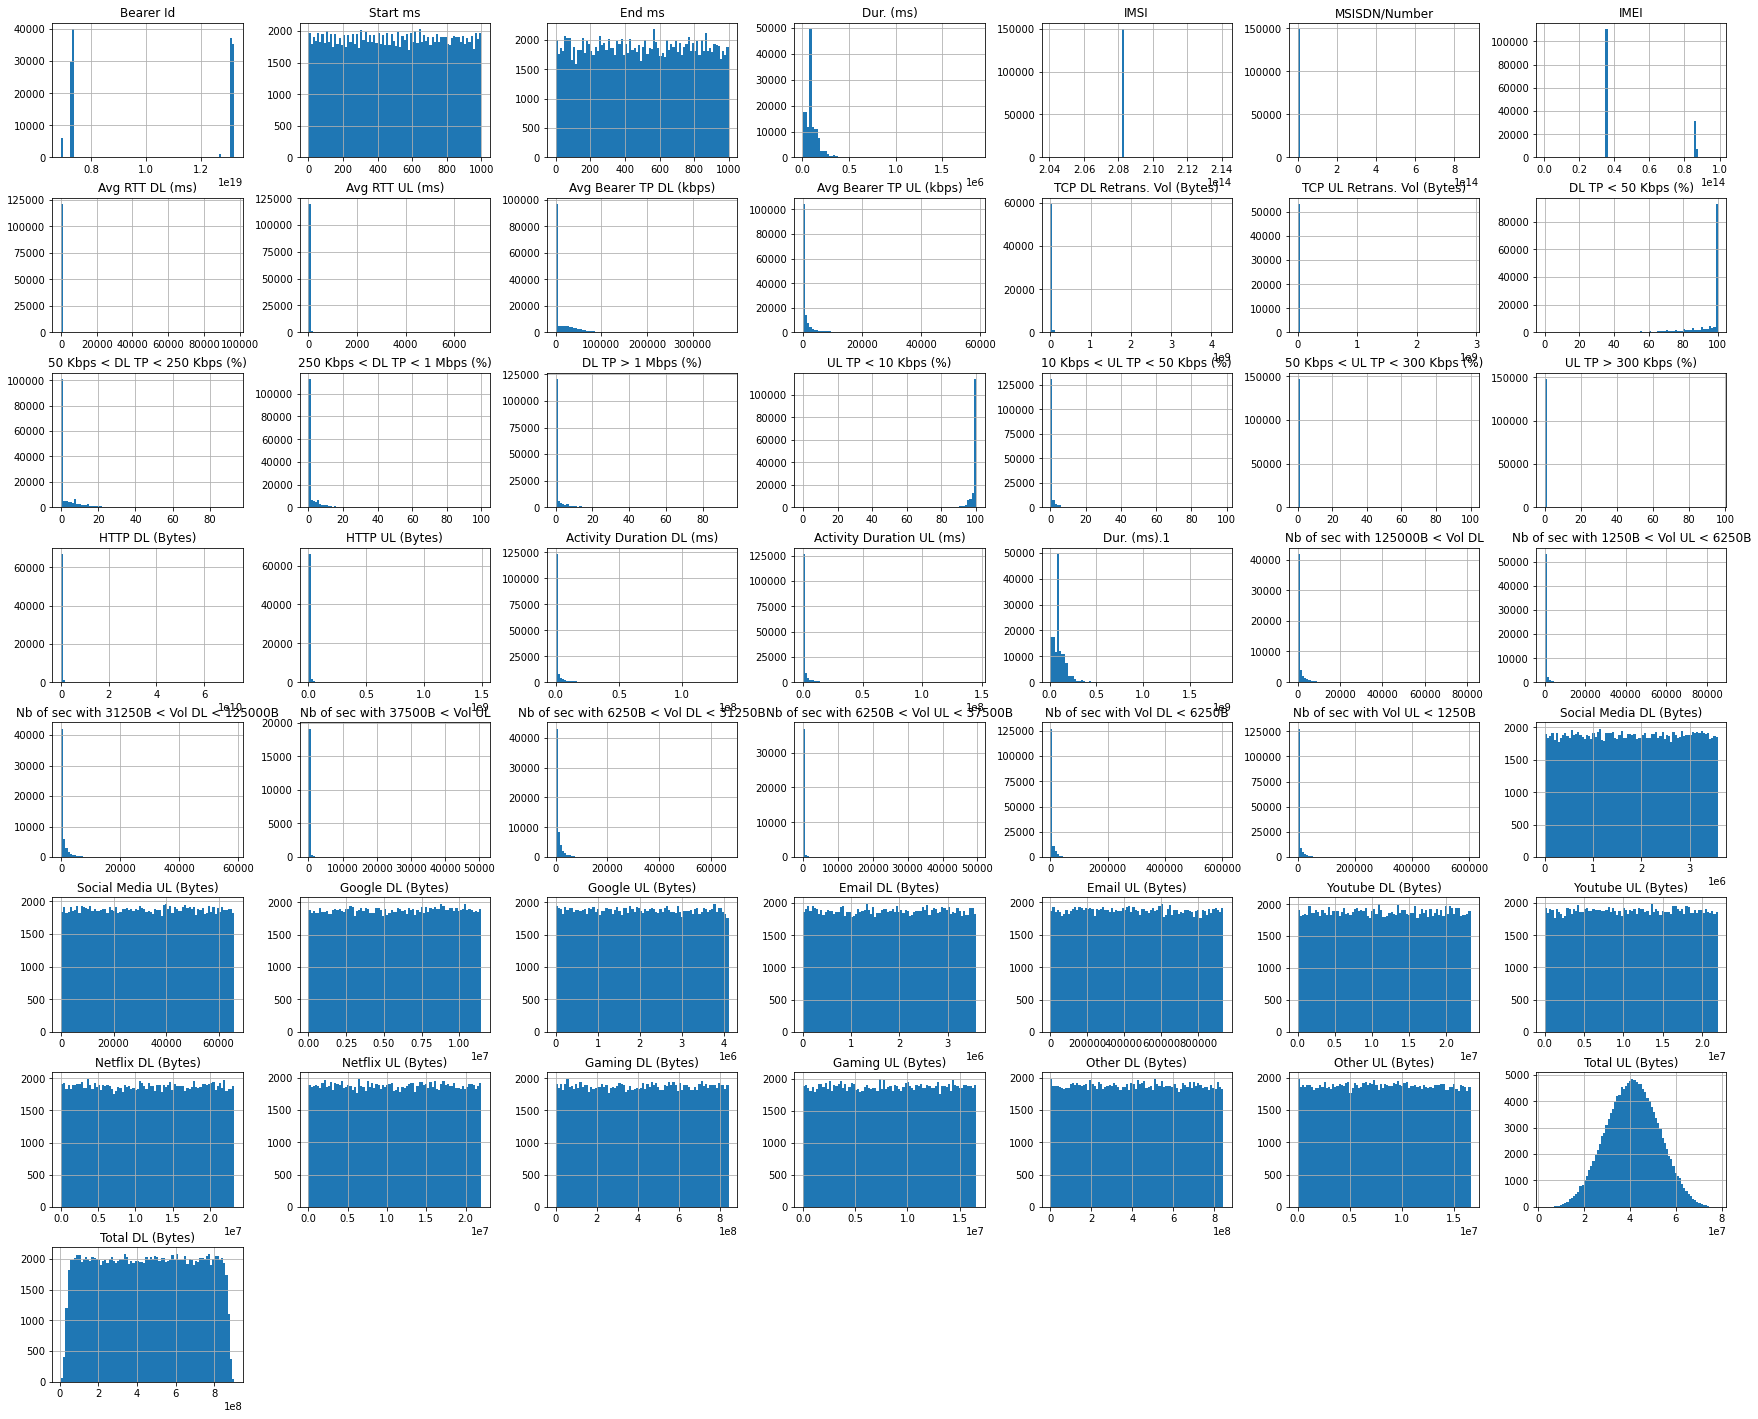

In [13]:
#to visualize skewness for every column,
db.hist(bins=80, figsize=(30,25))


## Exploratory Data Analsis

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':'The top 10 handset used by customers'}, ylabel='Handset Type'>

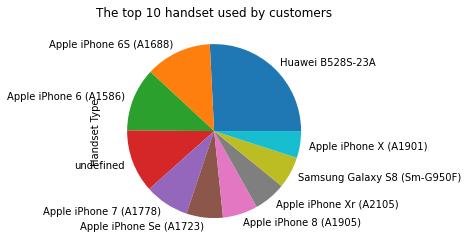

In [15]:
all = db['Handset Type'].value_counts().head(10)
print(all)
all.plot(kind="pie", title="The top 10 handset used by customers")

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


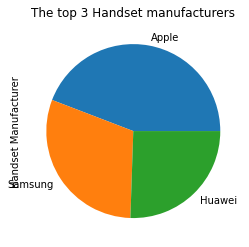

In [17]:
# top 3 handset manufacturers
mode= db['Handset Manufacturer'].mode()
db['Handset Manufacturer'].fillna(mode,inplace=True)
x = db['Handset Manufacturer'].value_counts().head(3)
print(x)
x.plot(kind="pie", title="The top 3 Handset manufacturers");

Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':' top 5 Huawei handset'}, ylabel='Handset Type'>

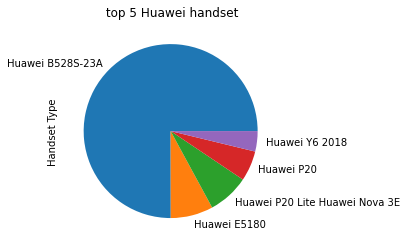

In [18]:
#top 5 Huawei handset types
top3 = db.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Huawei'].head(5)
print(top3)
top3.plot(kind="pie" , title=" top 5 Huawei handset")

Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':'top 5 Apple handset'}, ylabel='Handset Type'>

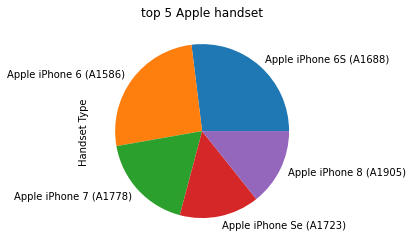

In [19]:
#top 5 Apple handset types.
apple = db.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Apple'].head()
print(apple)
apple.plot(kind="pie",  title = 'top 5 Apple handset')

Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64


<AxesSubplot:title={'center':'top 5 Samsung handset'}, ylabel='Handset Type'>

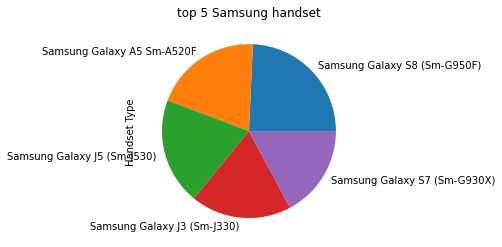

In [20]:
#top 5 Samsung handset types.
samsung = db.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Samsung'].head()
print(samsung)
samsung.plot(kind="pie", title = 'top 5 Samsung handset')

45547 users
Number of posts per user


<AxesSubplot:>

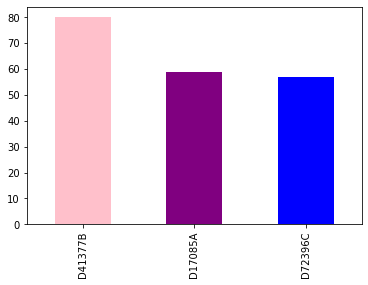

In [22]:
handset_manufacturer = db['Last Location Name'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['pink', 'purple', 'blue'])


Aggregate per user the following information in the column  
number of xDR sessions
Session duration
the total download (DL) and upload (UL) data
the total data volume (in Bytes) during this session for each application


In [29]:
def aggregation_cols(db,col_1,col_2,trim=False):
    
    grouped = db.groupby(col_1).agg({col_2: [min, max, sum]})  
    grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
    if trim:
        return grouped.describe()
    return grouped

In [40]:
aggregation_cols(db,'MSISDN/Number','Bearer Id',True)


,Bearer Id_min,Bearer Id_max,Bearer Id_sum
count,1.064710e+05,1.064710e+05,1.068560e+05
mean,9.861111e+18,9.884479e+18,1.410173e+19
std,2.880069e+18,2.882507e+18,1.062550e+19
min,6.917538e+18,6.917538e+18,0.000000e+00
25%,7.277826e+18,7.349883e+18,7.349883e+18
50%,7.349883e+18,7.349883e+18,1.304243e+19
75%,1.304243e+19,1.311448e+19,1.462771e+19
max,1.318654e+19,1.318654e+19,2.217933e+20


In [31]:
aggregation_cols(db,'MSISDN/Number',"Dur. (ms)",True)


,Dur. (ms)_min,Dur. (ms)_max,Dur. (ms)_sum
count,1.068560e+05,1.068560e+05,1.068560e+05
mean,9.670630e+04,1.092361e+05,1.461672e+05
std,6.860320e+04,8.302563e+04,1.863587e+05
min,7.142000e+03,7.142000e+03,7.142000e+03
25%,5.095100e+04,5.795325e+04,7.130800e+04
50%,8.639900e+04,8.640100e+04,1.027400e+05
75%,1.253688e+05,1.432058e+05,1.727990e+05
max,1.573420e+06,1.859336e+06,1.855375e+07


In [32]:
aggregation_cols(db,'MSISDN/Number','Total UL (Bytes)',True)


,Total UL (Bytes)_min,Total UL (Bytes)_max,Total UL (Bytes)_sum
count,1.068560e+05,1.068560e+05,1.068560e+05
mean,3.906698e+07,4.318572e+07,5.730942e+07
std,1.126727e+07,1.126055e+07,3.565765e+07
min,2.866892e+06,2.866892e+06,2.866892e+06
25%,3.105607e+07,3.544135e+07,3.639547e+07
50%,3.878098e+07,4.351793e+07,4.679387e+07
75%,4.684226e+07,5.121987e+07,6.573199e+07
max,7.833131e+07,7.833131e+07,7.295774e+08


In [35]:
aggregation_cols(db,'MSISDN/Number','Total UL (Bytes)',True)['Total UL (Bytes)_sum']


count    1.068560e+05
mean     5.730942e+07
std      3.565765e+07
min      2.866892e+06
25%      3.639547e+07
50%      4.679387e+07
75%      6.573199e+07
max      7.295774e+08
Name: Total UL (Bytes)_sum, dtype: float64

In [36]:
aggregation_cols(db,'MSISDN/Number','Total DL (Bytes)',True)


,Total DL (Bytes)_min,Total DL (Bytes)_max,Total DL (Bytes)_sum
count,1.068560e+05,1.068560e+05,1.068560e+05
mean,4.101001e+08,5.003891e+08,6.336527e+08
std,2.429118e+08,2.424849e+08,4.645551e+08
min,7.114041e+06,8.827082e+06,8.827082e+06
25%,1.956287e+08,2.990552e+08,3.148271e+08
50%,3.891675e+08,5.228647e+08,5.703677e+08
75%,6.119677e+08,7.137592e+08,8.073645e+08
max,9.029696e+08,9.029696e+08,8.156743e+09


In [38]:
aggregation_cols(db,'MSISDN/Number','Total DL (Bytes)',True)['Total DL (Bytes)_sum']


count    1.068560e+05
mean     6.336527e+08
std      4.645551e+08
min      8.827082e+06
25%      3.148271e+08
50%      5.703677e+08
75%      8.073645e+08
max      8.156743e+09
Name: Total DL (Bytes)_sum, dtype: float64

In [ ]:
#Check the frequency of user sessions. The results should show a total duration for each user in ms.
sessionsCountData=db['msisdn/number'].value_counts().head()

sessionsCount=sessionsCountData.values.tolist()

msisdn=sessionsCountData.index.values

sessionPerUserDictionary = dict(zip(msisdn, sessionsCount))

print(sessionPerUserDictionary)
db.groupby('msisdn/number')['dur._(ms)'].sum()

{33663706799.0: 1067, 33626320676.0: 18, 33614892860.0: 17, 33625779332.0: 17, 33659725664.0: 16}


msisdn/number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: dur._(ms), Length: 106856, dtype: float64

## Data Formating 

In [ ]:
#Clean the data using Preprocessing script.
preprocess = PreProcess(db)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150001 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150001 non-null  float64
 5   dur._(ms)                                 150001 non-null  float64
 6   imsi                                      150001 non-null  float64
 7   msisdn/number                             150001 non-null  float64
 8   imei                                      150001 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [ ]:
db = preprocess.clean_feature_name(db)


In [ ]:
db.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


Since we have a lot of rows, an easy way to deal with the missing values will be to drop the rows with duplicates.

In [ ]:
db = preprocess.drop_duplicates(db)


In [ ]:
# drop columns with more than 30% missing values
db_c, db_before_filling, missing_cols = preprocess.drop_variables(db)


Index(['start', 'end', 'last_location_name', 'handset_manufacturer',
       'handset_type'],
      dtype='object')


In [ ]:
print(missing_cols)


Index(['start', 'end', 'last_location_name', 'handset_manufacturer',
       'handset_type'],
      dtype='object')


Notice that the columns that don't have a count of 150,001 are printed as the missing columns. We then replace these missing values with 

Since there are numerous missing values and outliers, we replace them will median.

In [ ]:
cols, df_single, num_cols = preprocess.fill_numerical_variables(db)


Index(['bearer_id', 'start_ms', 'end_ms', 'dur._(ms)', 'imsi', 'msisdn/number',
       'imei', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)',
       'avg_bearer_tp_ul_(kbps)', 'tcp_dl_retrans._vol_(bytes)',
       'tcp_ul_retrans._vol_(bytes)', 'dl_tp_<_50_kbps_(%)',
       '50_kbps_<_dl_tp_<_250_kbps_(%)', '250_kbps_<_dl_tp_<_1_mbps_(%)',
       'dl_tp_>_1_mbps_(%)', 'ul_tp_<_10_kbps_(%)',
       '10_kbps_<_ul_tp_<_50_kbps_(%)', '50_kbps_<_ul_tp_<_300_kbps_(%)',
       'ul_tp_>_300_kbps_(%)', 'http_dl_(bytes)', 'http_ul_(bytes)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of_sec_with_vol_dl_<_6250b', 'nb_of_sec_with_vol_ul_<_1250b',
       'soci

In [ ]:
print(len(missing_cols))


5


## Data Transformation